# 과적합 피하기 - 초음파 광물 데이터

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from google.colab import files
up = files.upload()
filename = list(up.keys())[0]

Saving sonar.csv to sonar (2).csv


In [3]:
df = pd.read_csv(filename, header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [4]:
np.unique(df.values[:,-1], return_counts=True)
# df.values 는 M, R 때문에 모든 데이터가 문자열

(array(['M', 'R'], dtype=object), array([111,  97]))

In [5]:
# X data: scaling
# df.values하면 문자열, df.iloc를 하고values를 하면
# 슬라이싱 후 values 이기 때문에 숫자로 가능
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.iloc[:,:-1].values)

In [6]:
# Y data: label encoding
from sklearn.preprocessing import LabelEncoder
y_labeled = LabelEncoder().fit_transform(df.iloc[:,-1].values)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_labeled, stratify=y_labeled, test_size=0.2, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((166, 60), (42, 60), (166,), (42,))

- 모델 정의/설정/학습/평가

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

1. 은닉층: 2개

In [9]:
model1 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                4880      
                                                                 
 dense_1 (Dense)             (None, 12)                972       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [10]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=50, verbose=0)
model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.3529 - accuracy: 0.9048


[0.3528614640235901, 0.9047619104385376]

2. 은닉층: 4개

In [11]:
model2 = Sequential([
    Dense(64, input_dim=60, activation='relu'),
    Dense(30, activation='relu'),
    Dense(12, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                3904      
                                                                 
 dense_4 (Dense)             (None, 30)                1950      
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 4)                 52        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 6,283
Trainable params: 6,283
Non-trainable params: 0
_________________________________________________________________


In [12]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=50, verbose=0)
model2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.5415 - accuracy: 0.8095


[0.5415384769439697, 0.8095238208770752]

3. 은닉층: 6개

In [13]:
model3 = Sequential([
    Dense(64, input_dim=60, activation='relu'),
    Dense(40, activation='relu'),
    Dense(28, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                3904      
                                                                 
 dense_9 (Dense)             (None, 40)                2600      
                                                                 
 dense_10 (Dense)            (None, 28)                1148      
                                                                 
 dense_11 (Dense)            (None, 16)                464       
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 1)                

In [14]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=50, verbose=0)
model3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.5902 - accuracy: 0.8333


[0.5901775360107422, 0.8333333134651184]

- model1을 그대로 사용, epoch 횟수를 늘림

In [15]:
model = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 80)                4880      
                                                                 
 dense_16 (Dense)            (None, 12)                972       
                                                                 
 dense_17 (Dense)            (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=50, verbose=0)
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.6320 - accuracy: 0.8571


[0.631973385810852, 0.8571428656578064]

In [17]:
y_acc = hist.history['accuracy'][:100]
y_vloss = hist.history['val_loss'][:100]
xs = np.arange(1, len(y_acc)+1)

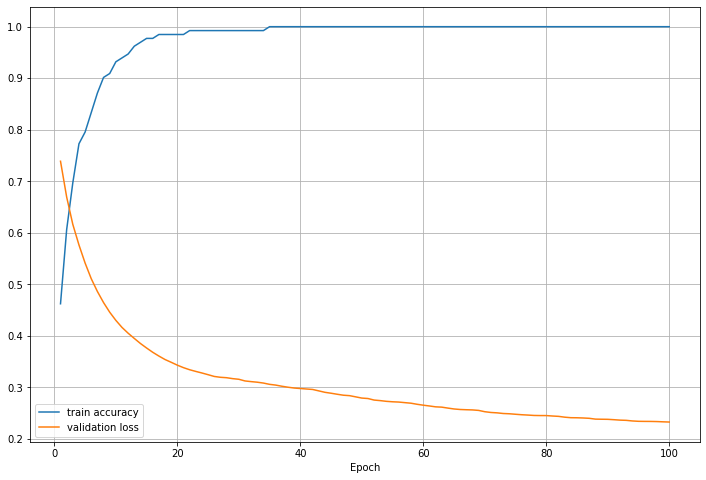

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

- 모델 저장조건 설정

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [20]:
import os
if not os.path.exists('model'):
    os.mkdir('model')

In [21]:
model_path = 'model/sonar.h5'
checkpoint = ModelCheckpoint(
    model_path, monitor='val_loss', verbose=1, save_best_only=True
)

In [22]:
model = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 80)                4880      
                                                                 
 dense_19 (Dense)            (None, 12)                972       
                                                                 
 dense_20 (Dense)            (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(
    X_train, y_train, validation_split=0.2, 
    epochs=400, batch_size=50, verbose=0,
    callbacks=[checkpoint]
)


Epoch 00001: val_loss improved from inf to 0.72003, saving model to model/sonar.h5

Epoch 00002: val_loss improved from 0.72003 to 0.66242, saving model to model/sonar.h5

Epoch 00003: val_loss improved from 0.66242 to 0.61769, saving model to model/sonar.h5

Epoch 00004: val_loss improved from 0.61769 to 0.58137, saving model to model/sonar.h5

Epoch 00005: val_loss improved from 0.58137 to 0.54842, saving model to model/sonar.h5

Epoch 00006: val_loss improved from 0.54842 to 0.51908, saving model to model/sonar.h5

Epoch 00007: val_loss improved from 0.51908 to 0.49327, saving model to model/sonar.h5

Epoch 00008: val_loss improved from 0.49327 to 0.47123, saving model to model/sonar.h5

Epoch 00009: val_loss improved from 0.47123 to 0.45347, saving model to model/sonar.h5

Epoch 00010: val_loss improved from 0.45347 to 0.43932, saving model to model/sonar.h5

Epoch 00011: val_loss improved from 0.43932 to 0.42671, saving model to model/sonar.h5

Epoch 00012: val_loss improved from

In [24]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

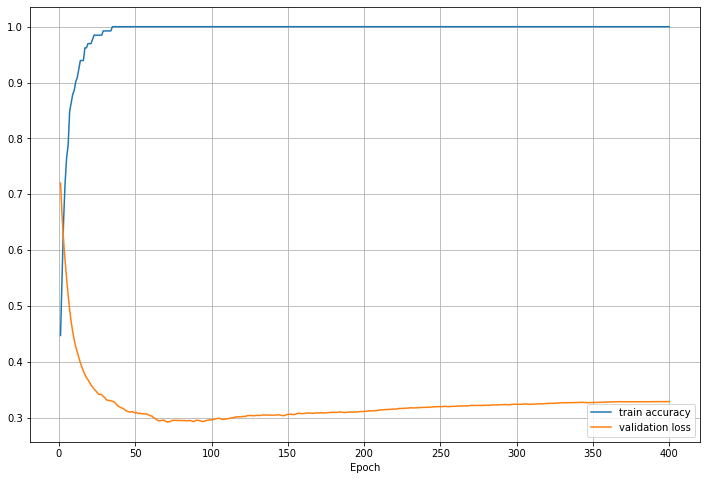

In [25]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

In [26]:
from tensorflow.keras.models import load_model
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)
# 과적합을 피할 수 있고 가장 학습이 잘 된 모델이 저장됨

2/2 [==============================] - 0s 6ms/step - loss: 0.3980 - accuracy: 0.7857


[0.3980017304420471, 0.7857142686843872]

- 조기 종료시점 설정

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=30)

In [28]:
model = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 80)                4880      
                                                                 
 dense_22 (Dense)            (None, 12)                972       
                                                                 
 dense_23 (Dense)            (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(
    X_train, y_train, validation_split=0.2, 
    epochs=400, batch_size=50, verbose=1,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/400
1/3 [=========>....................] - ETA: 0s - loss: 0.7483 - accuracy: 0.5600
Epoch 00001: val_loss did not improve from 0.29198
3/3 [==============================] - 1s 69ms/step - loss: 0.6912 - accuracy: 0.5985 - val_loss: 0.6417 - val_accuracy: 0.7647
Epoch 2/400
1/3 [=========>....................] - ETA: 0s - loss: 0.6430 - accuracy: 0.6600
Epoch 00002: val_loss did not improve from 0.29198
3/3 [==============================] - 0s 12ms/step - loss: 0.6252 - accuracy: 0.6894 - val_loss: 0.6079 - val_accuracy: 0.7647
Epoch 3/400
1/3 [=========>....................] - ETA: 0s - loss: 0.5551 - accuracy: 0.8000
Epoch 00003: val_loss did not improve from 0.29198
3/3 [==============================] - 0s 12ms/step - loss: 0.5818 - accuracy: 0.7424 - val_loss: 0.5741 - val_accuracy: 0.7647
Epoch 4/400
1/3 [=========>....................] - ETA: 0s - loss: 0.5898 - accuracy: 0.7200
Epoch 00004: val_loss did not improve from 0.29198
3/3 [==============================] - 0

In [30]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

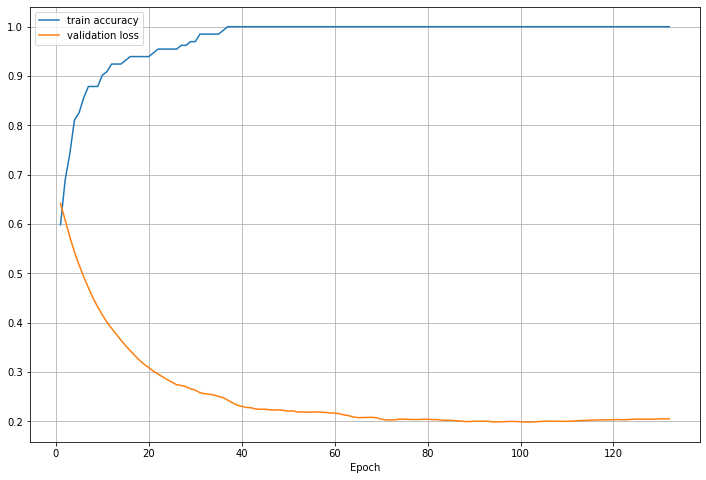

In [31]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

In [32]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.3861 - accuracy: 0.8571


[0.3861369490623474, 0.8571428656578064]